In [1]:
%load_ext jupyter_black

- primitive types
```python
x:int = 1
x:float = 1.0
x:None = None
x:str = "string"
x:bool = True
x:bool = False
```
- operators
- variables
- keywords (reserved words)
```python
import module
import module as alias
from module import Thing1, Thing2
from module import Thing1 as alias
from module import * # not recommended
# 
import matplotlib.pyplot as plt
from numpy.typing import ArrayLike
# - data types
return
yield
# - conditional
if
elif
else
# - loop
while True:...
for x in iterable:...
# - loop control
continue
break
# - scope
match
global
nonlocal
assert
pass == ...
# - exception handling
try
except
finally
raise
# - context manager
with
# - asyncronous programming
async
await
# 
del
lambda
class
def
```

- data structures

In [2]:
# - primitive types
int_ = 1
float_ = 1.0
str_ = "1"
bool_ = True


print(
    f"""\
- conditionals
{True and False = }
{True or False = }
{not True = }
{True and True = }
{True is True = }
{True is not True = }
{False is False = }

- type conversion
{int(False) = }
{int(True) = }
{bool(0) = }
{bool(1) = }
{bool(-1) = }
{bool("0") = }
{bool(int("0")) = }

- methods
{int_.bit_length() = }
{float_.is_integer() = } 
{str_.isnumeric() = }
{bool_.bit_length() = }
"""
)  # type: ignore

- conditionals
True and False = False
True or False = True
not True = False
True and True = True
True is True = True
True is not True = False
False is False = True

- type conversion
int(False) = 0
int(True) = 1
bool(0) = False
bool(1) = True
bool(-1) = True
bool("0") = True
bool(int("0")) = False

- methods
int_.bit_length() = 1
float_.is_integer() = True 
str_.isnumeric() = True
bool_.bit_length() = 1



In [3]:
list_ = [1, 2, 3]  # type: list[int]
tuple_ = (1, 2, 3)  # type: tuple[int, int, int]
set_ = {1, 2, 3}  # type: set[int]
dict_ = {1: "1", 2: "2", 3: "3"}  # type: dict[int, str]
print(
    f"""
lists are a mutable sequence of elements
{list_ = }
tuples are an immutable sequence of elements
{tuple_ = }
sets are a mutable collection of unique elements
{set_ = }
dictionaries are a mutable collection of key-value pairs
{dict_ = }
"""
)


lists are a mutable sequence of elements
list_ = [1, 2, 3]
tuples are an immutable sequence of elements
tuple_ = (1, 2, 3)
sets are a mutable collection of unique elements
set_ = {1, 2, 3}
dictionaries are a mutable collection of key-value pairs
dict_ = {1: '1', 2: '2', 3: '3'}



# Builtins

In [4]:
from __future__ import annotations
from typing import TypeGuard, Any
import builtins


def is_function(x: Any) -> TypeGuard[function]:
    return callable(x) and not isinstance(x, type)


def is_exception(x: Any) -> TypeGuard[type[Exception]]:
    return isinstance(x, type) and issubclass(x, BaseException)


def get_name(x: Any) -> str:
    if not hasattr(x, "__name__"):
        return x.__class__.__name__

    return x.__name__


x = dir(builtins)  # type: list[str]
objs = [getattr(builtins, i) for i in x]  # type: list[object]
classes = [obj for obj in objs if isinstance(obj, type) and not is_exception(obj)]
exceptions = [obj for obj in objs if is_exception(obj)]
functions = [obj for obj in objs if is_function(obj)]


print(
    f"""
classes = {', '.join(map(get_name, classes))}
functions = {', '.join(map(get_name, functions))}
exceptions = {', '.join(map(get_name, exceptions))}
{chr(0x1F4A9) = }
"""
)


classes = BuiltinImporter, bool, bytearray, bytes, classmethod, complex, dict, enumerate, filter, float, frozenset, int, list, map, memoryview, object, property, range, reversed, set, slice, staticmethod, str, super, tuple, type, zip
functions = __build_class__, __import__, abs, aiter, all, anext, any, ascii, bin, breakpoint, callable, chr, compile, _Printer, _Printer, delattr, dir, display, divmod, eval, exec, execfile, format, get_ipython, getattr, globals, hasattr, hash, _Helper, hex, id, raw_input, isinstance, issubclass, iter, len, _Printer, locals, max, min, next, oct, open, ord, pow, print, repr, round, runfile, setattr, sorted, sum, vars
exceptions = ArithmeticError, AssertionError, AttributeError, BaseException, BlockingIOError, BrokenPipeError, BufferError, BytesWarning, ChildProcessError, ConnectionAbortedError, ConnectionError, ConnectionRefusedError, ConnectionResetError, DeprecationWarning, EOFError, EncodingWarning, OSError, Exception, FileExistsError, FileNotFoundError

In [5]:
# __getitem__ and __setitem__
my_list = [1, 2, 3]
my_list[0] = 4
print(my_list)
my_list.__setitem__(
    1,  # position
    5,  # value
)
print(my_list)

[4, 2, 3]
[4, 5, 3]


In [6]:
# using slice
my_list = [1, 2, 3]
my_list[0:1] = [4, 5]
print(my_list)
my_list.__setitem__(
    slice(0, 1),  # slice
    [6, 7],  # value
)
print(my_list)

[4, 5, 2, 3]
[6, 7, 5, 2, 3]


In [7]:
IndexLike = slice | int | tuple[slice | int, ...]


class IndexSlice:
    def __getitem__(self, index: IndexLike) -> IndexLike:
        return index


idx = IndexSlice()
i = idx[0:1, 0:1:1, 1]
print(i)

(slice(0, 1, None), slice(0, 1, 1), 1)


[[2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.

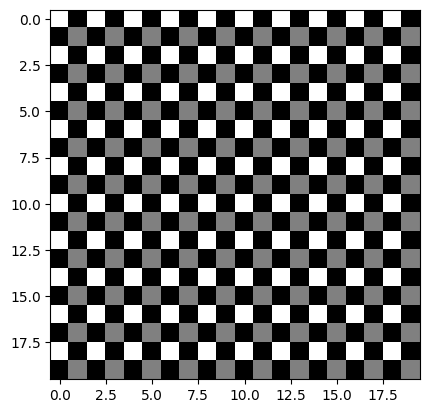

In [8]:
import numpy as np
import matplotlib.pyplot as plt

shape = 20, 20
a = np.zeros(np.prod(shape)).reshape(shape)  # black

a[1::2, 1::2] = 1.0  # grey
a[::2, ::2] = 2.0  # white
print(a)
plt.imshow(a, cmap="gray")
plt.show()

In [9]:
from typing import TypeVar, Mapping, overload, Hashable, Iterable


K = TypeVar("K", bound=Hashable)
V = TypeVar("V")


class MyMap(Mapping[K, V]):
    def __init__(self, data: Mapping[K, V] | Iterable[tuple[K, V]]) -> None:
        super().__init__()
        self._data = dict(data)

    @overload
    def __getitem__(self, key: K) -> V:
        ...

    @overload
    def __getitem__(self, key: list[K]) -> list[V]:
        ...

    def __getitem__(self, key: K | list[K]) -> V | list[V]:
        if isinstance(key, list):
            return [self._data[k] for k in key]
        return self._data[key]

    def __iter__(self) -> Iterable[K]:
        return iter(self._data)

    def __len__(self) -> int:
        return len(self._data)

In [ ]:
import glob

In [10]:
from typing import TypeVar, Generic, overload, Callable
from mesoscaler.typing import AnyArrayLike
from mesoscaler.utils import is_array_like

ListIndex = list[int] | list[bool] | list[str]
V_co = TypeVar("V_co", covariant=True)
R = TypeVar("R")


class Loc(Generic[V_co, R]):
    """
    ```
    s = pd.Series({"a": 1, "b": 2, "c": 3})  # type: pd.Series[int]
    loc = Loc(functools.partial(np.asarray, dtype=np.float_), s)  # type: Loc[float, NDArray[np.float_]]
    a = loc["a"]  # type: int
    bc = loc[["b", "c"]]  # type: NDArray[np.float_]
    arr = np.array([1, 2, 3]).astype(np.float_)  # type: NDArray[np.float_]
    list_loc = Loc(list, arr)  # type: Loc[np.float_, list[np.float_]]
    z = list_loc[0]  # type: np.float_
    assert isinstance(z, np.floating)
    x = list_loc[:]  # type: list[np.float_]
    ```
    """

    def __init__(self, hook: Callable[[AnyArrayLike[V_co]], R], x: AnyArrayLike[V_co]) -> None:
        self.x = x
        self.hook = hook

    @overload
    def __getitem__(self, item: int | str) -> V_co:
        ...

    @overload
    def __getitem__(self, item: ListIndex | slice) -> R:
        ...

    def __getitem__(self, item: ListIndex | int | str | slice) -> V_co | R:
        x = self.x[item]  # type: ignore
        if is_array_like(x):
            return self.hook(x)
        return x

In [ ]:
import numpy as np
from numpy.typing import NDArray
from typing import TypeVar, Sequence, Any

T = TypeVar("T", Sequence[int], Sequence[float], NDArray[np.int_], NDArray[np.float_])
a = np.random.randint(0, 100, 1000)
x = a.tolist()  # type: list[int]


def sort_unique(x: T) -> T:
    is_array = isinstance(x, np.ndarray)
    y = sorted(set(x))
    if is_array:
        y = np.array(y)
    return y  # type: ignore


b = sort_unique(a)
c = sort_unique(x)
%timeit sort_unique(a)
%timeit sort_unique(x)
%timeit sorted(set(x))
%timeit np.array(sorted(set(x)))
%timeit sorted(set(a))
%timeit np.sort(np.unique(a))
%timeit np.unique(np.sort(a))

In [11]:
from typing import Callable, Concatenate, TypeVar, ParamSpec
import functools
import textwrap

T = TypeVar("T")
Foo_T = TypeVar("Foo_T", bound="Foo")
P = ParamSpec("P")
R_co = TypeVar("R_co", covariant=True)
Method = Callable[Concatenate[T, P], R_co]
ClassMethod = Callable[Concatenate[type[T], P], R_co]


def class_method_decorator(meth: ClassMethod[Foo_T, P, R_co]) -> ClassMethod[Foo_T, P, R_co]:
    @functools.wraps(meth)
    def wrapper(cls: type[Foo_T], *args: P.args, **kwargs: P.kwargs):
        text = textwrap.dedent(
            f"""\
        @classmethod
        @class_method_decorator
        {cls}
        __class__ = {cls.__class__}
        {cls.num = }
        """
        )
        print(text)

        return meth(cls, *args, **kwargs)

    return wrapper


def method_decorator(meth: Method[Foo_T, P, R_co]) -> Method[Foo_T, P, R_co]:
    @functools.wraps(meth)
    def wrapper(self: Foo_T, *args: P.args, **kwargs: P.kwargs):
        text = textwrap.dedent(
            f"""\
        @method_decorator
        {self}
        __class__ = {self.__class__}
        {self.num = }
        """
        )

        print(text)
        return meth(self, *args, **kwargs)

    return wrapper


class Descriptor:
    def __init__(self, value: int) -> None:
        self.value = value

    def __get__(self, instance, owner) -> int:
        print("get")
        return self.value

    def __set__(self, instance, value) -> None:
        print(f"setting {instance} to {value}")
        self.value = value


class Foo:
    num = Descriptor(0)

    def __init__(self, n: int = 1):
        self.num = n

    @classmethod
    @class_method_decorator
    def cls_bar(cls, a: int, b: int) -> int:
        cls.num = num = (a + b) + cls.num
        return num

    @method_decorator
    def self_bar(self, a: int, b: int) -> int:
        self.num = num = (a + b) - self.num
        return num


foo = Foo(100)
foo2 = Foo(200)
print(
    f"""
{Foo.num = }
{foo.num = }
{foo2.num = }
{foo.self_bar(1, 2) = }
{Foo.num = }
{foo.num = }
{foo2.num = }
"""
)

setting <__main__.Foo object at 0x7f79ccb734c0> to 100
setting <__main__.Foo object at 0x7f79ccb71fc0> to 200
get
get
get
get
@method_decorator
__class__ = <class '__main__.Foo'>
self.num = 200

get
setting <__main__.Foo object at 0x7f79ccb734c0> to -197
get
get
get

Foo.num = 200
foo.num = 200
foo2.num = 200
foo.self_bar(1, 2) = -197
Foo.num = -197
foo.num = -197
foo2.num = -197

